In [2]:
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd

from matplotlib import animation as ani
#from JSAnimation import IPython_display

<IPython.core.display.Javascript object>


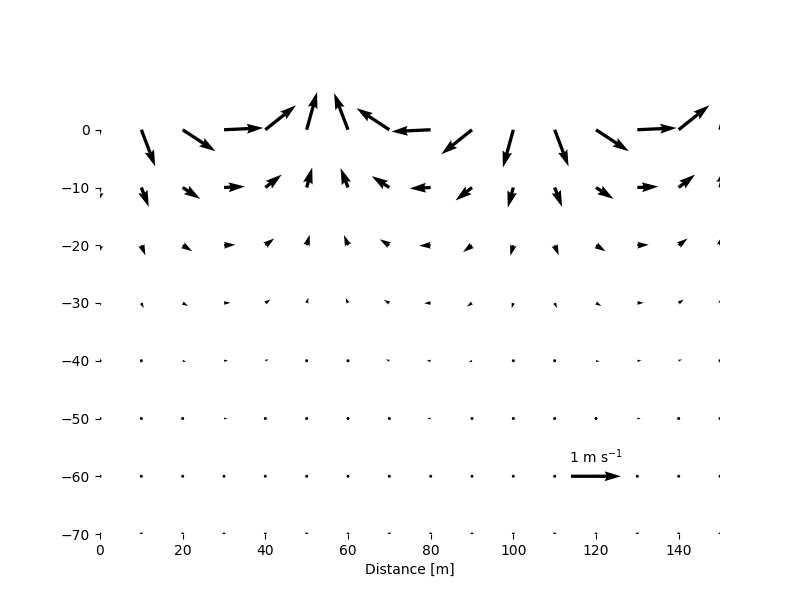

In [3]:
g = 9.81
denw = 1025.0  # Seawater density [kg/m**3].
sig = 7.3e-2  # Surface tension [N/m].
a = 1.0  # Wave amplitude [m].

L, h = 100.0, 50.0  # Wave height and water column depth.
k = 2 * np.pi / L
omega = np.sqrt((g * k + (sig / denw) * (k**3)) * np.tanh(k * h))
T = 2 * np.pi / omega
c = np.sqrt((g / k + (sig / denw) * k) * np.tanh(k * h))

# We'll solve the wave velocities in the `x` and `z` directions.
x, z = np.meshgrid(np.arange(0, 160, 10), np.arange(0, -80, -10),)
u, w = np.zeros_like(x), np.zeros_like(z)

def compute_vel(phase):
    u = a * omega * (np.cosh(k * (z+h)) / np.sinh(k*h)) * np.cos(k * x - phase)
    w = a * omega * (np.sinh(k * (z+h)) / np.sinh(k*h)) * np.sin(k * x - phase)
    mask = -z > h
    u[mask] = 0.0
    w[mask] = 0.0
    return u, w

def basic_animation(frames=91, interval=30, dt=0.3):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(xlim=(0, 150), ylim=(-70, 10))

    # Animated.
    quiver = ax.quiver(x, z, u, w, units='inches', scale=2)
    ax.quiverkey(quiver, 120, -60, 1,
                 label=r'1 m s$^{-1}$',
                 coordinates='data')
    line, = ax.plot([], [], 'b')

    # Non-animated.
    ax.plot([0, 150], [0, 0], 'k:')
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('Distance [m]')
    text = (r'$\lambda$ = %s m;  h = %s m;  kh = %2.3f;  h/L = %s' %
            (L, h, k * h, h/L))
    ax.text(10, -65, text)
    time_step = ax.text(10, -58, '')
    line.set_data([], [])

    def init():
        return line, quiver, time_step

    def animate(i):
        time = i * dt
        phase = omega * time
        eta = a * np.cos(x[0] * k - phase)
        u, w = compute_vel(phase)
        quiver.set_UVC(u, w)
        line.set_data(x[0], 5 * eta)
        time_step.set_text('Time = %s s' % time)
        return line, quiver, time_step

    return ani.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)

dt = 0.3
basic_animation(dt=dt)